<a href="https://colab.research.google.com/github/musti9311/CodTech-Internship/blob/main/Image_Classification_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# We use CIFAR-10: 60,000 color images in 10 classes
print("Loading CIFAR-10 Dataset...")
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

Loading CIFAR-10 Dataset...
170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [3]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [4]:
# Define class names for visualization
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

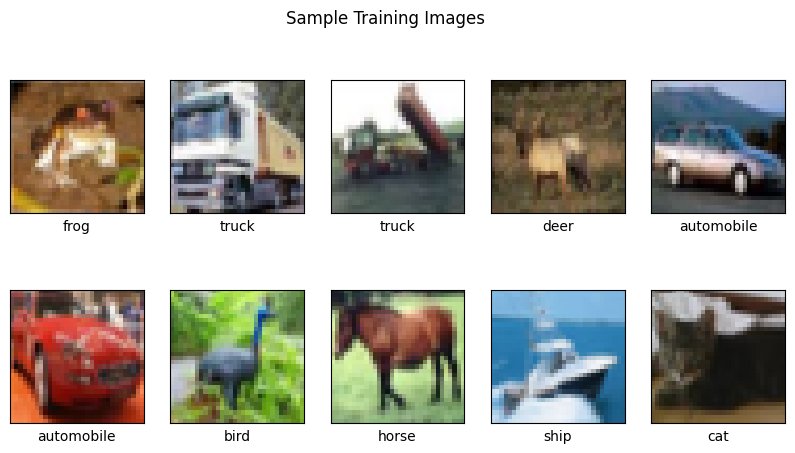

In [5]:
# Show the first 10 images to verify data
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.suptitle("Sample Training Images")
plt.show()

In [6]:
print("Building CNN Model...")
model = models.Sequential()

Building CNN Model...


In [7]:
# Convolutional Base
# Layer 1: Extract features (edges, textures)
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2))) # Downsample (reduce size)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
# Layer 2: Extract more complex features
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

In [9]:
# Layer 3
model.add(layers.Conv2D(64, (3, 3), activation='relu'))


In [10]:
# Dense Layers (Classifier)
model.add(layers.Flatten()) # Convert 3D maps to 1D vector
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10)) # Output layer (10 classes)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

print("\nStarting Training (10 Epochs)...")
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))



Starting Training (10 Epochs)...
Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.3541 - loss: 1.7471 - val_accuracy: 0.5742 - val_loss: 1.1957
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5819 - loss: 1.1814 - val_accuracy: 0.6041 - val_loss: 1.1346
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.6546 - loss: 0.9800 - val_accuracy: 0.6526 - val_loss: 0.9937
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6946 - loss: 0.8712 - val_accuracy: 0.6822 - val_loss: 0.9222
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7219 - loss: 0.7896 - val_accuracy: 0.7107 - val_loss: 0.8389
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7470 - loss: 0.7234 - val_accuracy: 0.7199 - val_loss: 0.8192
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7580 - loss: 0.6849 - val_accuracy: 0.7008 - val_loss: 0.8977
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step -

In [12]:
# Evaluate on test data
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(f"\nTest Accuracy: {test_acc*100:.2f}%")

313/313 - 1s - 2ms/step - accuracy: 0.7214 - loss: 0.8471

Test Accuracy: 72.14%


Text(0.5, 1.0, 'Training vs Validation Accuracy')

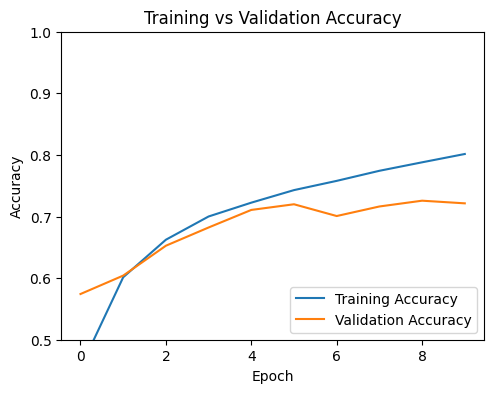

In [13]:
# Plot Accuracy Graph
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.title('Training vs Validation Accuracy')

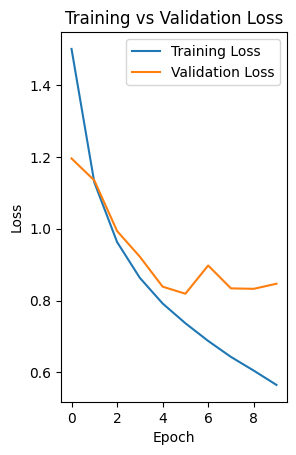

In [14]:
# Plot Loss Graph
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training vs Validation Loss')
plt.show()


Sample Predictions:
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 521ms/step


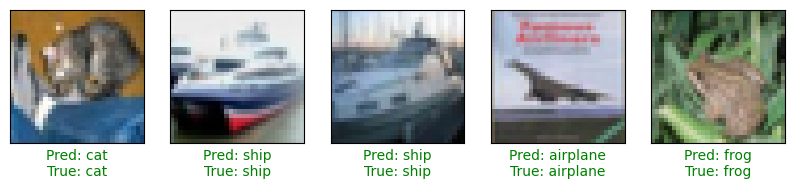

In [15]:
# Test Predictions on specific images
print("\nSample Predictions:")
predictions = model.predict(test_images[:5])
plt.figure(figsize=(10,3))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i])
    predicted_label = class_names[np.argmax(predictions[i])]
    true_label = class_names[test_labels[i][0]]
    color = 'green' if predicted_label == true_label else 'red'
    plt.xlabel(f"Pred: {predicted_label}\nTrue: {true_label}", color=color)
plt.show()